In [ ]:
import numpy as np
import pandas as pd
ipl=pd.read_csv('/workspaces/Pandas/pandas_dataframe/ipl-matches.csv')
ipl
movies=pd.read_csv('/workspaces/Pandas/pandas_dataframe/movies.csv')
movies

In [15]:
#i. astype--> To change type of data in column of dataframe for memory management
ipl['ID']=ipl['ID'].astype('int32')
print(ipl['ID'].dtype)

ipl['WinningTeam']=ipl["WinningTeam"].astype('category')
ipl.info()

int32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               950 non-null    int32   
 1   City             899 non-null    object  
 2   Date             950 non-null    object  
 3   Season           950 non-null    object  
 4   MatchNumber      950 non-null    object  
 5   Team1            950 non-null    object  
 6   Team2            950 non-null    object  
 7   Venue            950 non-null    object  
 8   TossWinner       950 non-null    object  
 9   TossDecision     950 non-null    object  
 10  SuperOver        946 non-null    object  
 11  WinningTeam      946 non-null    category
 12  WonBy            950 non-null    object  
 13  Margin           932 non-null    float64 
 14  method           19 non-null     object  
 15  Player_of_Match  946 non-null    object  
 16  Team1Players     950 non-null    objec

In [16]:
##ii. values_counts(): counts frequency of repeated values
deep=pd.Series([1,1,2,2,3,4,3])
deep.value_counts()

1    2
2    2
3    2
4    1
Name: count, dtype: int64

In [27]:
#find which players has won most man of he match ( in finals and qualifiers)
ipl[~ipl['MatchNumber'].str.isdigit()]["Player_of_Match"].value_counts()

Player_of_Match
KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar 

In [28]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


<Axes: ylabel='count'>

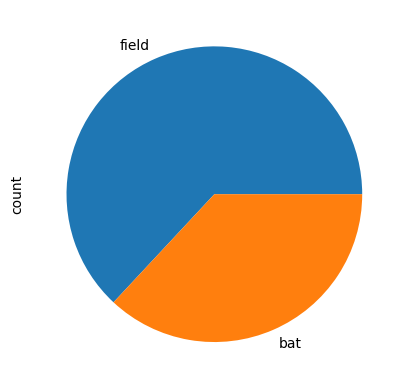

In [30]:
#toss decision plot:
toss=ipl["TossDecision"].value_counts()
toss.plot(kind='pie')

In [32]:
#how many matches each team has played
(ipl['Team1'].value_counts()+ ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [33]:
##iii. sort_values()
#sorting on the basis of values: attributes-> inplace, ascending
#sort_values() on dataframe containing nan value
movies['title_x'].sort_values(ascending=True)

1498          16 December (film)
1021                 1920 (film)
287                 1920: London
723       1920: The Evil Returns
1039            1971 (2007 film)
                  ...           
778     Zindagi Na Milegi Dobara
670            Zindagi Tere Naam
756                     Zokkomon
939        Zor Lagaa Ke...Haiya!
1623                    Zubeidaa
Name: title_x, Length: 1629, dtype: object

In [41]:
#sorting on the basis of multiple columns
movies.sort_values(['title_x','year_of_release'],ascending=[True,True])[['title_x','year_of_release']]

,title_x,year_of_release
1498,16 December (film),2002
1021,1920 (film),2008
287,1920: London,2016
723,1920: The Evil Returns,2012
1039,1971 (2007 film),2007
...,...,...
778,Zindagi Na Milegi Dobara,2011
670,Zindagi Tere Naam,2012
756,Zokkomon,2011
939,Zor Lagaa Ke...Haiya!,2009


In [45]:
#rank
batsman=pd.read_csv('/workspaces/Pandas/pandas_dataframe/batsman_runs_ipl.csv')
batsman

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
600,Yash Dayal,0
601,Yashpal Singh,47
602,Younis Khan,3
603,Yuvraj Singh,2754


In [89]:
batsman['batting_rank']=batsman['batsman_run'].rank(ascending=False)
a=batsman['batting_rank'].sort_values()
batsman.sort_values('batting_rank')
 # batsman['batsman_run'].sort_values(ascending=False)

,batsman_run,batting_rank
batter,,
V Kohli,6634,1.0
S Dhawan,6244,2.0
DA Warner,5883,3.0
RG Sharma,5881,4.0
SK Raina,5536,5.0
...,...,...
SS Cottrell,0,594.0
S Kaushik,0,594.0
IC Pandey,0,594.0


In [90]:
#v. sort_index()
movies.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [94]:
#vi. set_index()
batsman.set_index('batsman_run')

,batting_rank
batsman_run,
280,166.5
161,226.0
4,535.0
53,329.0
25,402.5
...,...
0,594.0
47,343.0
3,547.5


In [96]:
batsman.reset_index()

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [112]:
movies.reset_index()

,title_x,imdb,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [117]:
#rename(): to rename column name and index name
movies.rename(columns={'imdb_id':"imdb"}) 
movies.reset_index().set_index('title_x')
movies.rename(index={'Uri: The Surgical Strike':"Uri"})

,imdb,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


In [ ]:
#unique()/ nunique()
#unique values returns unique values but also returns nan values
#nunique return unique values but exclude nan values